In [ ]:
# Stores NLI For Vilt10000

In [1]:
import transformers
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
import torch
from pysat.formula import IDPool, WCNFPlus
from pysat.examples.rc2 import RC2
import numpy as np
import matplotlib.pyplot as plt
import json

# custom modules
import sys
sys.path.append('./nlic')
import qa_converter
import nli
import solver

device = "cuda"

In [2]:
converter = qa_converter.QAConverter()
nlier = nli.NLIInferencer(model_hf_name="ynie/roberta-large-snli_mnli_fever_anli_R1_R2_R3-nli", confidence_threshold=0.0,
                         dedup_constraints=False)
# qsolver = solver.Solver(beta=0.3)

/nlp/scr/jnoh2/miniconda3/envs/nli-consistency-vilt/lib/python3.9/site-packages/transformers/models/t5/tokenization_t5_fast.py:155: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(
Some weights of the model checkpoint at ynie/roberta-large-snli_mnli_fever_anli_R1_R2_R3-nli were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.poo

In [3]:
### INSTRUCTION FOR USERS : INDICATE APPROPRIATE PATH
data_path = '/u/scr/nlp/data/nli-consistency/vilt_results/vilt-run-train-10000im-3pred-40token-1seed_predictions.json'

with open(data_path, 'r') as f:
    data = json.load(f)

### INSTRUCTION FOR USERS : INDICATE APPROPRIATE PATH
save_path = '/u/scr/nlp/data/nli-consistency/vilt_results/vilt-run-train-10000im-3pred-40token-1seed_predictions_nli.json'

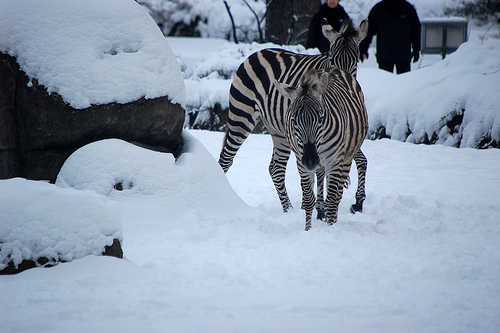

In [4]:
from PIL import Image

image = Image.open('/u/scr/nlp/data/nli-consistency/vg_data/VG_100K/2370978.jpg')
image

In [5]:
cap_images = 1000

In [6]:
# Normalize

num_choices = 2
not_redundant = True # I.e. self comparisons -- it doesn't add much value since false will still yield truth value
repeated_comparisons = False # I.e. identical comparisons; as in what if there are multiple answer confidence levels? No because regardless based on single statement
group_count = num_choices

raw_correct = 0
new_correct = 0
good_change = 0
bad_change = 0
count = 0
questions_done = 0

for key in data.keys():
    print('image #:', questions_done + 1, 'image number', key)
    img_data = data[key]
    for group in img_data.keys():
        group_list = img_data[group]
        
        qs_list = []
        ans_list = []
        conf_list = []
        for i in range(len(group_list)):
            qs = group_list[i]
            qs_list.append(qs['question'].capitalize())
            ans_list.append(qs['prediction'][0:num_choices])
            conf_list.append(qs['prob'][0:num_choices])
            
        converted = converter(qs_list, ans_list)
        # save
        statement_groups = [[(converted[i][j], conf_list[i][j]) for j in range(len(converted[i]))] for i in range(len(converted))]
        # save
        converted_flat = [qs for list1 in converted for qs in list1]
        # save
        compared = nlier(converted_flat, group_count = group_count, not_redundant=not_redundant)
        if not repeated_comparisons:
            compared = list(set(compared))
            
        data[key][group] = {'orig':group_list, 'nli':{'statement_groups':statement_groups,'converted_flat':converted_flat,'compared':compared}}
        
    questions_done += 1        

print(questions_done)

image #: 1 image number 2372795
image #: 2 image number 2405817
image #: 3 image number 2339665
image #: 4 image number 2396053
image #: 5 image number 2407048
image #: 6 image number 2417670
image #: 7 image number 2330006
image #: 8 image number 2372820
image #: 9 image number 2368858
image #: 10 image number 2333203
image #: 11 image number 2354153
image #: 12 image number 2332989
image #: 13 image number 2381034
image #: 14 image number 2407360
image #: 15 image number 2409623
image #: 16 image number 2355757
image #: 17 image number 2403475
image #: 18 image number 2375266
image #: 19 image number 2371210
image #: 20 image number 2381003
image #: 21 image number 2315492
image #: 22 image number 2348881
image #: 23 image number 2357334
image #: 24 image number 2369947
image #: 25 image number 2317773
image #: 26 image number 2381903
image #: 27 image number 2386518
image #: 28 image number 2348085
image #: 29 image number 2383483
image #: 30 image number 2346676
image #: 31 image n

image #: 246 image number 2347468
image #: 247 image number 2344723
image #: 248 image number 2328889
image #: 249 image number 2344181
image #: 250 image number 2338814
image #: 251 image number 2355926
image #: 252 image number 2364110
image #: 253 image number 2386436
image #: 254 image number 2327400
image #: 255 image number 2391382
image #: 256 image number 2331117
image #: 257 image number 2344641
image #: 258 image number 2369616
image #: 259 image number 2375347
image #: 260 image number 2346285
image #: 261 image number 2407367
image #: 262 image number 2406260
image #: 263 image number 2332443
image #: 264 image number 2317355
image #: 265 image number 2369213
image #: 266 image number 2403989
image #: 267 image number 2353413
image #: 268 image number 2385042
image #: 269 image number 2413870
image #: 270 image number 2328404
image #: 271 image number 2334836
image #: 272 image number 2362727
image #: 273 image number 2384981
image #: 274 image number 2365159
image #: 275 i

image #: 488 image number 2316880
image #: 489 image number 2396777
image #: 490 image number 2395018
image #: 491 image number 2326761
image #: 492 image number 2324201
image #: 493 image number 2358502
image #: 494 image number 2363866
image #: 495 image number 2387050
image #: 496 image number 2360012
image #: 497 image number 2334561
image #: 498 image number 2361181
image #: 499 image number 107928
image #: 500 image number 2389923
image #: 501 image number 2379706
image #: 502 image number 2412342
image #: 503 image number 2073
image #: 504 image number 2417779
image #: 505 image number 2327597
image #: 506 image number 2334142
image #: 507 image number 2385427
image #: 508 image number 2343017
image #: 509 image number 2379995
image #: 510 image number 2386847
image #: 511 image number 3250
image #: 512 image number 2318586
image #: 513 image number 2373491
image #: 514 image number 2317055
image #: 515 image number 2364344
image #: 516 image number 2335954
image #: 517 image nu

image #: 731 image number 2363765
image #: 732 image number 2371508
image #: 733 image number 2345755
image #: 734 image number 2347556
image #: 735 image number 2322218
image #: 736 image number 2345064
image #: 737 image number 2389160
image #: 738 image number 2353279
image #: 739 image number 2391217
image #: 740 image number 2331790
image #: 741 image number 2334328
image #: 742 image number 2409770
image #: 743 image number 2342108
image #: 744 image number 2405820
image #: 745 image number 2408478
image #: 746 image number 2409414
image #: 747 image number 2372356
image #: 748 image number 2365521
image #: 749 image number 2384491
image #: 750 image number 2385643
image #: 751 image number 2316174
image #: 752 image number 2380930
image #: 753 image number 2361328
image #: 754 image number 2394670
image #: 755 image number 2402412
image #: 756 image number 2404373
image #: 757 image number 1593136
image #: 758 image number 2360260
image #: 759 image number 2333110
image #: 760 i

image #: 975 image number 2383386
image #: 976 image number 2411575
image #: 977 image number 2345921
image #: 978 image number 2350032
image #: 979 image number 2379120
image #: 980 image number 2362475
image #: 981 image number 2412544
image #: 982 image number 2322820
image #: 983 image number 2388699
image #: 984 image number 2400586
image #: 985 image number 2316735
image #: 986 image number 2325678
image #: 987 image number 2357001
image #: 988 image number 2386784
image #: 989 image number 2407011
image #: 990 image number 2391117
image #: 991 image number 2412492
image #: 992 image number 2382717
image #: 993 image number 2392934
image #: 994 image number 2319510
image #: 995 image number 2380248
image #: 996 image number 2350915
image #: 997 image number 2384541
image #: 998 image number 2348854
image #: 999 image number 2410342
image #: 1000 image number 2325837
image #: 1001 image number 2397314
image #: 1002 image number 2325301
image #: 1003 image number 2372703
image #: 1

image #: 1211 image number 2332087
image #: 1212 image number 2321496
image #: 1213 image number 2413879
image #: 1214 image number 2322768
image #: 1215 image number 2373544
image #: 1216 image number 2377676
image #: 1217 image number 2343684
image #: 1218 image number 2394079
image #: 1219 image number 2340845
image #: 1220 image number 2409267
image #: 1221 image number 2409113
image #: 1222 image number 2319516
image #: 1223 image number 4347
image #: 1224 image number 2343900
image #: 1225 image number 2373075
image #: 1226 image number 2370261
image #: 1227 image number 2349616
image #: 1228 image number 2404453
image #: 1229 image number 2397997
image #: 1230 image number 2410644
image #: 1231 image number 2370995
image #: 1232 image number 2358906
image #: 1233 image number 2390920
image #: 1234 image number 2366390
image #: 1235 image number 2376700
image #: 1236 image number 2349684
image #: 1237 image number 2415135
image #: 1238 image number 2404534
image #: 1239 image num

image #: 1447 image number 2323277
image #: 1448 image number 2373155
image #: 1449 image number 2352144
image #: 1450 image number 2410275
image #: 1451 image number 2412701
image #: 1452 image number 2416141
image #: 1453 image number 2366243
image #: 1454 image number 3651
image #: 1455 image number 2338412
image #: 1456 image number 2388929
image #: 1457 image number 2410842
image #: 1458 image number 2400495
image #: 1459 image number 2354471
image #: 1460 image number 3592
image #: 1461 image number 61524
image #: 1462 image number 2401899
image #: 1463 image number 2323989
image #: 1464 image number 2384561
image #: 1465 image number 2323420
image #: 1466 image number 2348629
image #: 1467 image number 2344848
image #: 1468 image number 2366713
image #: 1469 image number 2344919
image #: 1470 image number 2413587
image #: 1471 image number 2408252
image #: 1472 image number 2397911
image #: 1473 image number 2371040
image #: 1474 image number 1105
image #: 1475 image number 2368

image #: 1683 image number 2398823
image #: 1684 image number 2328093
image #: 1685 image number 2338978
image #: 1686 image number 2323477
image #: 1687 image number 713213
image #: 1688 image number 2379609
image #: 1689 image number 2355278
image #: 1690 image number 2384283
image #: 1691 image number 2383513
image #: 1692 image number 2353474
image #: 1693 image number 2329038
image #: 1694 image number 2375533
image #: 1695 image number 2406657
image #: 1696 image number 2409230
image #: 1697 image number 2362902
image #: 1698 image number 2409582
image #: 1699 image number 2330508
image #: 1700 image number 2340929
image #: 1701 image number 2359128
image #: 1702 image number 2376878
image #: 1703 image number 2398441
image #: 1704 image number 2363656
image #: 1705 image number 2328260
image #: 1706 image number 2389449
image #: 1707 image number 2353060
image #: 1708 image number 2379059
image #: 1709 image number 2407240
image #: 1710 image number 2331340
image #: 1711 image n

image #: 1919 image number 2356343
image #: 1920 image number 2320858
image #: 1921 image number 2364251
image #: 1922 image number 2370207
image #: 1923 image number 2386240
image #: 1924 image number 2406054
image #: 1925 image number 2363966
image #: 1926 image number 2333961
image #: 1927 image number 2329124
image #: 1928 image number 2337481
image #: 1929 image number 2360265
image #: 1930 image number 2346770
image #: 1931 image number 2416070
image #: 1932 image number 2393905
image #: 1933 image number 2353154
image #: 1934 image number 47
image #: 1935 image number 2396313
image #: 1936 image number 2337044
image #: 1937 image number 2335926
image #: 1938 image number 2385235
image #: 1939 image number 2331507
image #: 1940 image number 2395801
image #: 1941 image number 2356949
image #: 1942 image number 2372056
image #: 1943 image number 2396118
image #: 1944 image number 2339925
image #: 1945 image number 2392852
image #: 1946 image number 1592789
image #: 1947 image numbe

image #: 2154 image number 2370258
image #: 2155 image number 2323846
image #: 2156 image number 2350035
image #: 2157 image number 2320238
image #: 2158 image number 2353003
image #: 2159 image number 2393042
image #: 2160 image number 2399307
image #: 2161 image number 2317479
image #: 2162 image number 2372680
image #: 2163 image number 2377991
image #: 2164 image number 2375168
image #: 2165 image number 2391890
image #: 2166 image number 2371322
image #: 2167 image number 2368976
image #: 2168 image number 2341581
image #: 2169 image number 2348672
image #: 2170 image number 2401140
image #: 2171 image number 2371390
image #: 2172 image number 2319584
image #: 2173 image number 2332002
image #: 2174 image number 2416542
image #: 2175 image number 2354477
image #: 2176 image number 1592404
image #: 2177 image number 2322391
image #: 2178 image number 2417438
image #: 2179 image number 2348296
image #: 2180 image number 2400357
image #: 2181 image number 2355301
image #: 2182 image 

image #: 2389 image number 2322443
image #: 2390 image number 2322183
image #: 2391 image number 2404978
image #: 2392 image number 2373383
image #: 2393 image number 1592814
image #: 2394 image number 2340491
image #: 2395 image number 2417328
image #: 2396 image number 2403162
image #: 2397 image number 2414903
image #: 2398 image number 2398298
image #: 2399 image number 2377555
image #: 2400 image number 2387396
image #: 2401 image number 2378404
image #: 2402 image number 2404065
image #: 2403 image number 2316011
image #: 2404 image number 2377429
image #: 2405 image number 2415555
image #: 2406 image number 2364704
image #: 2407 image number 2348909
image #: 2408 image number 2370031
image #: 2409 image number 2339621
image #: 2410 image number 2379555
image #: 2411 image number 2395782
image #: 2412 image number 2363136
image #: 2413 image number 2409427
image #: 2414 image number 2365519
image #: 2415 image number 2384745
image #: 2416 image number 2366653
image #: 2417 image 

image #: 2624 image number 2336073
image #: 2625 image number 2357582
image #: 2626 image number 2342300
image #: 2627 image number 2352705
image #: 2628 image number 2316948
image #: 2629 image number 2332024
image #: 2630 image number 2376550
image #: 2631 image number 2341519
image #: 2632 image number 2363143
image #: 2633 image number 2376336
image #: 2634 image number 2390294
image #: 2635 image number 2412645
image #: 2636 image number 2337950
image #: 2637 image number 2416171
image #: 2638 image number 2318798
image #: 2639 image number 2388517
image #: 2640 image number 2386286
image #: 2641 image number 2401533
image #: 2642 image number 2391520
image #: 2643 image number 2334399
image #: 2644 image number 2403499
image #: 2645 image number 2392050
image #: 2646 image number 2342553
image #: 2647 image number 2387415
image #: 2648 image number 2345313
image #: 2649 image number 2350183
image #: 2650 image number 2388608
image #: 2651 image number 2363091
image #: 2652 image 

image #: 2859 image number 2323032
image #: 2860 image number 2376709
image #: 2861 image number 2392431
image #: 2862 image number 2415708
image #: 2863 image number 2399341
image #: 2864 image number 2395924
image #: 2865 image number 2389875
image #: 2866 image number 2358248
image #: 2867 image number 2322172
image #: 2868 image number 2348646
image #: 2869 image number 2380498
image #: 2870 image number 2327531
image #: 2871 image number 2407775
image #: 2872 image number 2412166
image #: 2873 image number 2316646
image #: 2874 image number 2356281
image #: 2875 image number 2323404
image #: 2876 image number 2346981
image #: 2877 image number 2341486
image #: 2878 image number 2404895
image #: 2879 image number 2376577
image #: 2880 image number 2408473
image #: 2881 image number 2366039
image #: 2882 image number 2339347
image #: 2883 image number 2387384
image #: 2884 image number 713721
image #: 2885 image number 2354613
image #: 2886 image number 2406142
image #: 2887 image n

image #: 3094 image number 4785
image #: 3095 image number 2338028
image #: 3096 image number 2342578
image #: 3097 image number 2354892
image #: 3098 image number 2328306
image #: 3099 image number 2348745
image #: 3100 image number 2382364
image #: 3101 image number 2341825
image #: 3102 image number 2391287
image #: 3103 image number 2413793
image #: 3104 image number 2372246
image #: 3105 image number 2405276
image #: 3106 image number 2409546
image #: 3107 image number 2336314
image #: 3108 image number 2328803
image #: 3109 image number 2374970
image #: 3110 image number 2401333
image #: 3111 image number 2339931
image #: 3112 image number 2336569
image #: 3113 image number 2337466
image #: 3114 image number 2364259
image #: 3115 image number 2354174
image #: 3116 image number 2346632
image #: 3117 image number 1973
image #: 3118 image number 2344365
image #: 3119 image number 150384
image #: 3120 image number 2379406
image #: 3121 image number 2362862
image #: 3122 image number 

image #: 3331 image number 2349052
image #: 3332 image number 2380088
image #: 3333 image number 2403994
image #: 3334 image number 2380195
image #: 3335 image number 2390337
image #: 3336 image number 2343868
image #: 3337 image number 2394540
image #: 3338 image number 4006
image #: 3339 image number 2400587
image #: 3340 image number 2327278
image #: 3341 image number 2322862
image #: 3342 image number 2323372
image #: 3343 image number 2414977
image #: 3344 image number 2343543
image #: 3345 image number 2387864
image #: 3346 image number 2391830
image #: 3347 image number 2366108
image #: 3348 image number 4375
image #: 3349 image number 2390365
image #: 3350 image number 2405610
image #: 3351 image number 2384536
image #: 3352 image number 2411090
image #: 3353 image number 2382336
image #: 3354 image number 2413531
image #: 3355 image number 2372425
image #: 3356 image number 2358858
image #: 3357 image number 2364978
image #: 3358 image number 2388498
image #: 3359 image number

image #: 3566 image number 2343812
image #: 3567 image number 2343160
image #: 3568 image number 2321693
image #: 3569 image number 2339788
image #: 3570 image number 2372191
image #: 3571 image number 2318971
image #: 3572 image number 2400702
image #: 3573 image number 2387184
image #: 3574 image number 2400838
image #: 3575 image number 2317800
image #: 3576 image number 1159740
image #: 3577 image number 2404611
image #: 3578 image number 2364290
image #: 3579 image number 2387541
image #: 3580 image number 2349216
image #: 3581 image number 2350987
image #: 3582 image number 2353045
image #: 3583 image number 2380835
image #: 3584 image number 2343548
image #: 3585 image number 2321900
image #: 3586 image number 2368018
image #: 3587 image number 2385313
image #: 3588 image number 2407974
image #: 3589 image number 2328778
image #: 3590 image number 2363703
image #: 3591 image number 2377328
image #: 3592 image number 2346279
image #: 3593 image number 3987
image #: 3594 image num

image #: 3801 image number 2349276
image #: 3802 image number 2325938
image #: 3803 image number 2367288
image #: 3804 image number 2406255
image #: 3805 image number 2395232
image #: 3806 image number 2375727
image #: 3807 image number 2404897
image #: 3808 image number 2376783
image #: 3809 image number 2407898
image #: 3810 image number 2417721
image #: 3811 image number 2399066
image #: 3812 image number 2384224
image #: 3813 image number 2317989
image #: 3814 image number 2332762
image #: 3815 image number 2345702
image #: 3816 image number 2404589
image #: 3817 image number 2396294
image #: 3818 image number 2381831
image #: 3819 image number 2343851
image #: 3820 image number 2335846
image #: 3821 image number 2323637
image #: 3822 image number 2364499
image #: 3823 image number 2386806
image #: 3824 image number 2409691
image #: 3825 image number 2382765
image #: 3826 image number 2383075
image #: 3827 image number 2382594
image #: 3828 image number 2399078
image #: 3829 image 

image #: 4037 image number 2394764
image #: 4038 image number 2409300
image #: 4039 image number 2383690
image #: 4040 image number 2368342
image #: 4041 image number 713503
image #: 4042 image number 2390351
image #: 4043 image number 2358256
image #: 4044 image number 2339001
image #: 4045 image number 2405374
image #: 4046 image number 2380720
image #: 4047 image number 2356380
image #: 4048 image number 2350143
image #: 4049 image number 2329755
image #: 4050 image number 2377108
image #: 4051 image number 2336808
image #: 4052 image number 2408097
image #: 4053 image number 2373112
image #: 4054 image number 2408095
image #: 4055 image number 2379726
image #: 4056 image number 2380489
image #: 4057 image number 2360518
image #: 4058 image number 2337220
image #: 4059 image number 2338400
image #: 4060 image number 2317656
image #: 4061 image number 2320527
image #: 4062 image number 2354030
image #: 4063 image number 2417025
image #: 4064 image number 2346401
image #: 4065 image n

image #: 4273 image number 2320742
image #: 4274 image number 2414205
image #: 4275 image number 2391761
image #: 4276 image number 2345939
image #: 4277 image number 2397650
image #: 4278 image number 2404140
image #: 4279 image number 2370194
image #: 4280 image number 2363475
image #: 4281 image number 2343097
image #: 4282 image number 2403156
image #: 4283 image number 2385722
image #: 4284 image number 150416
image #: 4285 image number 2377272
image #: 4286 image number 2337507
image #: 4287 image number 2377915
image #: 4288 image number 2320374
image #: 4289 image number 2357055
image #: 4290 image number 2321475
image #: 4291 image number 2376282
image #: 4292 image number 2328857
image #: 4293 image number 2361016
image #: 4294 image number 2356138
image #: 4295 image number 2335528
image #: 4296 image number 2412484
image #: 4297 image number 2370142
image #: 4298 image number 2380397
image #: 4299 image number 2375047
image #: 4300 image number 2368634
image #: 4301 image n

image #: 4508 image number 2416548
image #: 4509 image number 2363178
image #: 4510 image number 2350696
image #: 4511 image number 2403542
image #: 4512 image number 2411460
image #: 4513 image number 2354732
image #: 4514 image number 285657
image #: 4515 image number 2392955
image #: 4516 image number 2338698
image #: 4517 image number 2318654
image #: 4518 image number 528
image #: 4519 image number 2414250
image #: 4520 image number 1159775
image #: 4521 image number 2362854
image #: 4522 image number 2393143
image #: 4523 image number 2333791
image #: 4524 image number 2385414
image #: 4525 image number 2327402
image #: 4526 image number 2401897
image #: 4527 image number 2386100
image #: 4528 image number 2413237
image #: 4529 image number 2380764
image #: 4530 image number 2315374
image #: 4531 image number 2395287
image #: 4532 image number 2544
image #: 4533 image number 2397749
image #: 4534 image number 2404099
image #: 4535 image number 2400655
image #: 4536 image number 1

image #: 4744 image number 3802
image #: 4745 image number 2399188
image #: 4746 image number 2388911
image #: 4747 image number 2331931
image #: 4748 image number 2416835
image #: 4749 image number 2386985
image #: 4750 image number 2321297
image #: 4751 image number 2322726
image #: 4752 image number 1591984
image #: 4753 image number 2387468
image #: 4754 image number 3911
image #: 4755 image number 2346078
image #: 4756 image number 2360246
image #: 4757 image number 2324489
image #: 4758 image number 2355709
image #: 4759 image number 2351344
image #: 4760 image number 2364535
image #: 4761 image number 2346604
image #: 4762 image number 2363768
image #: 4763 image number 2366263
image #: 4764 image number 2413213
image #: 4765 image number 2412399
image #: 4766 image number 4002
image #: 4767 image number 2370366
image #: 4768 image number 2400300
image #: 4769 image number 2325092
image #: 4770 image number 1592416
image #: 4771 image number 2359632
image #: 4772 image number 24

image #: 4980 image number 2369293
image #: 4981 image number 2376682
image #: 4982 image number 2329760
image #: 4983 image number 2404263
image #: 4984 image number 2396456
image #: 4985 image number 2372524
image #: 4986 image number 2320783
image #: 4987 image number 2352215
image #: 4988 image number 2327774
image #: 4989 image number 2319538
image #: 4990 image number 2316971
image #: 4991 image number 2371373
image #: 4992 image number 2383487
image #: 4993 image number 4120
image #: 4994 image number 2343260
image #: 4995 image number 2341806
image #: 4996 image number 2404295
image #: 4997 image number 2403190
image #: 4998 image number 2365310
image #: 4999 image number 2351507
image #: 5000 image number 2398658
image #: 5001 image number 2398181
image #: 5002 image number 2396047
image #: 5003 image number 2399329
image #: 5004 image number 2321187
image #: 5005 image number 2344186
image #: 5006 image number 2382403
image #: 5007 image number 2359331
image #: 5008 image num

image #: 5216 image number 286005
image #: 5217 image number 2390839
image #: 5218 image number 2339855
image #: 5219 image number 2361233
image #: 5220 image number 4825
image #: 5221 image number 2396479
image #: 5222 image number 2359120
image #: 5223 image number 2328870
image #: 5224 image number 2398076
image #: 5225 image number 2373494
image #: 5226 image number 2383297
image #: 5227 image number 2354784
image #: 5228 image number 2384980
image #: 5229 image number 2417969
image #: 5230 image number 2345296
image #: 5231 image number 2335733
image #: 5232 image number 2358739
image #: 5233 image number 2400537
image #: 5234 image number 2398718
image #: 5235 image number 2367331
image #: 5236 image number 374
image #: 5237 image number 2364719
image #: 5238 image number 2319153
image #: 5239 image number 2359951
image #: 5240 image number 2365350
image #: 5241 image number 2363745
image #: 5242 image number 2360051
image #: 5243 image number 2413016
image #: 5244 image number 2

image #: 5453 image number 2355382
image #: 5454 image number 2371229
image #: 5455 image number 2367174
image #: 5456 image number 2381133
image #: 5457 image number 2380018
image #: 5458 image number 2368431
image #: 5459 image number 2319441
image #: 5460 image number 2363631
image #: 5461 image number 2333413
image #: 5462 image number 2341662
image #: 5463 image number 2349868
image #: 5464 image number 2360912
image #: 5465 image number 2368686
image #: 5466 image number 2322130
image #: 5467 image number 2411402
image #: 5468 image number 2405964
image #: 5469 image number 2340570
image #: 5470 image number 2397481
image #: 5471 image number 2354263
image #: 5472 image number 2369820
image #: 5473 image number 2387900
image #: 5474 image number 2390871
image #: 5475 image number 2348701
image #: 5476 image number 2369296
image #: 5477 image number 2367100
image #: 5478 image number 2384347
image #: 5479 image number 2385732
image #: 5480 image number 2378039
image #: 5481 image 

image #: 5688 image number 4195
image #: 5689 image number 2401221
image #: 5690 image number 1160193
image #: 5691 image number 2362174
image #: 5692 image number 2377981
image #: 5693 image number 2408937
image #: 5694 image number 2378351
image #: 5695 image number 2371095
image #: 5696 image number 2406512
image #: 5697 image number 2338000
image #: 5698 image number 2318225
image #: 5699 image number 2316870
image #: 5700 image number 2351889
image #: 5701 image number 2324149
image #: 5702 image number 2387115
image #: 5703 image number 2393897
image #: 5704 image number 2401326
image #: 5705 image number 2413886
image #: 5706 image number 2387027
image #: 5707 image number 2340353
image #: 5708 image number 2337667
image #: 5709 image number 2318941
image #: 5710 image number 2319117
image #: 5711 image number 2395536
image #: 5712 image number 2408615
image #: 5713 image number 2315909
image #: 5714 image number 2350622
image #: 5715 image number 2386074
image #: 5716 image num

image #: 5924 image number 2371293
image #: 5925 image number 2415593
image #: 5926 image number 2325004
image #: 5927 image number 2377859
image #: 5928 image number 2374684
image #: 5929 image number 2366051
image #: 5930 image number 2402536
image #: 5931 image number 2392815
image #: 5932 image number 2358022
image #: 5933 image number 2364705
image #: 5934 image number 2383163
image #: 5935 image number 2326203
image #: 5936 image number 2412952
image #: 5937 image number 2363207
image #: 5938 image number 2356112
image #: 5939 image number 2366721
image #: 5940 image number 2346002
image #: 5941 image number 2371992
image #: 5942 image number 2388438
image #: 5943 image number 2364127
image #: 5944 image number 2329616
image #: 5945 image number 2401264
image #: 5946 image number 2385215
image #: 5947 image number 611
image #: 5948 image number 2343675
image #: 5949 image number 2397688
image #: 5950 image number 2394698
image #: 5951 image number 2399171
image #: 5952 image numb

image #: 6159 image number 2414410
image #: 6160 image number 2368402
image #: 6161 image number 2381966
image #: 6162 image number 2391009
image #: 6163 image number 2353116
image #: 6164 image number 2341966
image #: 6165 image number 2411649
image #: 6166 image number 2396635
image #: 6167 image number 2401092
image #: 6168 image number 2395101
image #: 6169 image number 2387580
image #: 6170 image number 2404556
image #: 6171 image number 2372128
image #: 6172 image number 2350691
image #: 6173 image number 2391421
image #: 6174 image number 2326164
image #: 6175 image number 2386508
image #: 6176 image number 2316252
image #: 6177 image number 2352778
image #: 6178 image number 2316352
image #: 6179 image number 2364609
image #: 6180 image number 2411666
image #: 6181 image number 2403227
image #: 6182 image number 2336802
image #: 6183 image number 2321576
image #: 6184 image number 2410319
image #: 6185 image number 2415598
image #: 6186 image number 2328761
image #: 6187 image 

image #: 6394 image number 2354538
image #: 6395 image number 2411998
image #: 6396 image number 2397798
image #: 6397 image number 2364060
image #: 6398 image number 2411820
image #: 6399 image number 2374786
image #: 6400 image number 2351126
image #: 6401 image number 2345602
image #: 6402 image number 2331031
image #: 6403 image number 2404331
image #: 6404 image number 524
image #: 6405 image number 2331505
image #: 6406 image number 2379492
image #: 6407 image number 2411287
image #: 6408 image number 2417251
image #: 6409 image number 1191
image #: 6410 image number 2363278
image #: 6411 image number 2316920
image #: 6412 image number 2346781
image #: 6413 image number 2360083
image #: 6414 image number 2344260
image #: 6415 image number 2394407
image #: 6416 image number 2352097
image #: 6417 image number 2409609
image #: 6418 image number 2348215
image #: 6419 image number 2352348
image #: 6420 image number 2391843
image #: 6421 image number 2398319
image #: 6422 image number 

image #: 6630 image number 2393795
image #: 6631 image number 2368317
image #: 6632 image number 2397591
image #: 6633 image number 2362002
image #: 6634 image number 2371527
image #: 6635 image number 2398597
image #: 6636 image number 1592307
image #: 6637 image number 2381901
image #: 6638 image number 2379869
image #: 6639 image number 2401503
image #: 6640 image number 2412056
image #: 6641 image number 2327268
image #: 6642 image number 2349437
image #: 6643 image number 2388575
image #: 6644 image number 2413948
image #: 6645 image number 2363920
image #: 6646 image number 2334180
image #: 6647 image number 2374156
image #: 6648 image number 2361482
image #: 6649 image number 2320294
image #: 6650 image number 2374572
image #: 6651 image number 2403965
image #: 6652 image number 2362826
image #: 6653 image number 2373243
image #: 6654 image number 2404542
image #: 6655 image number 2374837
image #: 6656 image number 2359019
image #: 6657 image number 713803
image #: 6658 image n

image #: 6865 image number 2359224
image #: 6866 image number 2395374
image #: 6867 image number 2345399
image #: 6868 image number 2347812
image #: 6869 image number 2380715
image #: 6870 image number 2389833
image #: 6871 image number 2349797
image #: 6872 image number 2342515
image #: 6873 image number 2408826
image #: 6874 image number 2377404
image #: 6875 image number 2353956
image #: 6876 image number 2350745
image #: 6877 image number 2412751
image #: 6878 image number 2365278
image #: 6879 image number 2315863
image #: 6880 image number 2411406
image #: 6881 image number 2364892
image #: 6882 image number 2376567
image #: 6883 image number 2361286
image #: 6884 image number 2378694
image #: 6885 image number 2358305
image #: 6886 image number 2319670
image #: 6887 image number 2328437
image #: 6888 image number 2351836
image #: 6889 image number 2412512
image #: 6890 image number 2319365
image #: 6891 image number 2404404
image #: 6892 image number 2330935
image #: 6893 image 

image #: 7101 image number 2355267
image #: 7102 image number 2342086
image #: 7103 image number 2409490
image #: 7104 image number 2380492
image #: 7105 image number 2371487
image #: 7106 image number 2403034
image #: 7107 image number 2345881
image #: 7108 image number 2372864
image #: 7109 image number 2316784
image #: 7110 image number 2408721
image #: 7111 image number 2392604
image #: 7112 image number 2318470
image #: 7113 image number 2316182
image #: 7114 image number 2318149
image #: 7115 image number 2399300
image #: 7116 image number 2381025
image #: 7117 image number 2382981
image #: 7118 image number 2402445
image #: 7119 image number 2409640
image #: 7120 image number 2380416
image #: 7121 image number 2318826
image #: 7122 image number 2363559
image #: 7123 image number 2333486
image #: 7124 image number 2372500
image #: 7125 image number 2403171
image #: 7126 image number 2381503
image #: 7127 image number 2389582
image #: 7128 image number 2415012
image #: 7129 image 

image #: 7336 image number 2353832
image #: 7337 image number 2317747
image #: 7338 image number 2343190
image #: 7339 image number 2353818
image #: 7340 image number 2319841
image #: 7341 image number 2394697
image #: 7342 image number 2365742
image #: 7343 image number 2361465
image #: 7344 image number 713143
image #: 7345 image number 2382220
image #: 7346 image number 2352597
image #: 7347 image number 2317985
image #: 7348 image number 2401370
image #: 7349 image number 2354623
image #: 7350 image number 2397572
image #: 7351 image number 2410068
image #: 7352 image number 2347961
image #: 7353 image number 2344757
image #: 7354 image number 2384697
image #: 7355 image number 2381277
image #: 7356 image number 2402256
image #: 7357 image number 2361792
image #: 7358 image number 2416442
image #: 7359 image number 2369277
image #: 7360 image number 2320587
image #: 7361 image number 3207
image #: 7362 image number 2338049
image #: 7363 image number 2365136
image #: 7364 image numb

image #: 7572 image number 2389099
image #: 7573 image number 2388602
image #: 7574 image number 2316769
image #: 7575 image number 2412143
image #: 7576 image number 2345068
image #: 7577 image number 2354548
image #: 7578 image number 2404425
image #: 7579 image number 2326863
image #: 7580 image number 2397015
image #: 7581 image number 2317282
image #: 7582 image number 2344033
image #: 7583 image number 2358520
image #: 7584 image number 2362323
image #: 7585 image number 2326958
image #: 7586 image number 2408295
image #: 7587 image number 2371946
image #: 7588 image number 2325295
image #: 7589 image number 2363550
image #: 7590 image number 2385552
image #: 7591 image number 2411745
image #: 7592 image number 2391346
image #: 7593 image number 2327937
image #: 7594 image number 2367919
image #: 7595 image number 2325693
image #: 7596 image number 2320954
image #: 7597 image number 2347158
image #: 7598 image number 2400060
image #: 7599 image number 498180
image #: 7600 image n

image #: 7807 image number 2349985
image #: 7808 image number 2385303
image #: 7809 image number 2321891
image #: 7810 image number 2361087
image #: 7811 image number 2355236
image #: 7812 image number 2341621
image #: 7813 image number 2369720
image #: 7814 image number 2393263
image #: 7815 image number 2345026
image #: 7816 image number 2346667
image #: 7817 image number 2403688
image #: 7818 image number 2345791
image #: 7819 image number 150410
image #: 7820 image number 2316980
image #: 7821 image number 2380691
image #: 7822 image number 2372614
image #: 7823 image number 2410890
image #: 7824 image number 2370171
image #: 7825 image number 2381744
image #: 7826 image number 2401576
image #: 7827 image number 2402267
image #: 7828 image number 2376220
image #: 7829 image number 2389265
image #: 7830 image number 2409402
image #: 7831 image number 2318397
image #: 7832 image number 2348135
image #: 7833 image number 2369562
image #: 7834 image number 2388986
image #: 7835 image n

image #: 8043 image number 2337799
image #: 8044 image number 2342405
image #: 8045 image number 2338969
image #: 8046 image number 2334094
image #: 8047 image number 2390636
image #: 8048 image number 2359364
image #: 8049 image number 2332088
image #: 8050 image number 2404107
image #: 8051 image number 2346306
image #: 8052 image number 2361719
image #: 8053 image number 2355377
image #: 8054 image number 2367641
image #: 8055 image number 2359139
image #: 8056 image number 2390746
image #: 8057 image number 2327994
image #: 8058 image number 2390932
image #: 8059 image number 2344892
image #: 8060 image number 2328867
image #: 8061 image number 2348862
image #: 8062 image number 2397614
image #: 8063 image number 2340704
image #: 8064 image number 2390538
image #: 8065 image number 2414538
image #: 8066 image number 2360182
image #: 8067 image number 2407585
image #: 8068 image number 2387630
image #: 8069 image number 2352861
image #: 8070 image number 2361669
image #: 8071 image 

image #: 8278 image number 2357747
image #: 8279 image number 2341416
image #: 8280 image number 1160086
image #: 8281 image number 2357841
image #: 8282 image number 1505
image #: 8283 image number 2392003
image #: 8284 image number 2318900
image #: 8285 image number 2375510
image #: 8286 image number 2352905
image #: 8287 image number 2372976
image #: 8288 image number 2371961
image #: 8289 image number 2343607
image #: 8290 image number 1358
image #: 8291 image number 2345200
image #: 8292 image number 2355797
image #: 8293 image number 2355670
image #: 8294 image number 2329982
image #: 8295 image number 2407318
image #: 8296 image number 2330290
image #: 8297 image number 2319259
image #: 8298 image number 2349199
image #: 8299 image number 2365942
image #: 8300 image number 2336156
image #: 8301 image number 2360363
image #: 8302 image number 497915
image #: 8303 image number 2403382
image #: 8304 image number 2410224
image #: 8305 image number 2414251
image #: 8306 image number 

image #: 8514 image number 2331732
image #: 8515 image number 2326521
image #: 8516 image number 2350613
image #: 8517 image number 2354644
image #: 8518 image number 2327859
image #: 8519 image number 2353496
image #: 8520 image number 2391878
image #: 8521 image number 2364276
image #: 8522 image number 2320740
image #: 8523 image number 4741
image #: 8524 image number 2401866
image #: 8525 image number 2350539
image #: 8526 image number 2328033
image #: 8527 image number 2415279
image #: 8528 image number 2327667
image #: 8529 image number 2336087
image #: 8530 image number 2400338
image #: 8531 image number 2340542
image #: 8532 image number 2336240
image #: 8533 image number 2339108
image #: 8534 image number 2383945
image #: 8535 image number 2367832
image #: 8536 image number 2377798
image #: 8537 image number 2400583
image #: 8538 image number 2400677
image #: 8539 image number 2360206
image #: 8540 image number 2348597
image #: 8541 image number 2347582
image #: 8542 image num

image #: 8749 image number 2406270
image #: 8750 image number 2375924
image #: 8751 image number 2318298
image #: 8752 image number 713115
image #: 8753 image number 2407459
image #: 8754 image number 2343286
image #: 8755 image number 2338144
image #: 8756 image number 2391506
image #: 8757 image number 2330305
image #: 8758 image number 2407632
image #: 8759 image number 2357503
image #: 8760 image number 2323746
image #: 8761 image number 2369172
image #: 8762 image number 2380505
image #: 8763 image number 2366501
image #: 8764 image number 2373146
image #: 8765 image number 2362668
image #: 8766 image number 2411959
image #: 8767 image number 2387034
image #: 8768 image number 2354730
image #: 8769 image number 2403288
image #: 8770 image number 2338577
image #: 8771 image number 2407094
image #: 8772 image number 2370729
image #: 8773 image number 1491
image #: 8774 image number 2388148
image #: 8775 image number 2385998
image #: 8776 image number 2409223
image #: 8777 image numb

image #: 8985 image number 2350625
image #: 8986 image number 2400805
image #: 8987 image number 2352550
image #: 8988 image number 2345664
image #: 8989 image number 2339693
image #: 8990 image number 2368363
image #: 8991 image number 2332749
image #: 8992 image number 2380446
image #: 8993 image number 1593259
image #: 8994 image number 2342960
image #: 8995 image number 2402454
image #: 8996 image number 2405759
image #: 8997 image number 2319936
image #: 8998 image number 2367165
image #: 8999 image number 2404487
image #: 9000 image number 2346835
image #: 9001 image number 1592517
image #: 9002 image number 2323037
image #: 9003 image number 2379019
image #: 9004 image number 1593200
image #: 9005 image number 2416198
image #: 9006 image number 2403480
image #: 9007 image number 206
image #: 9008 image number 2389275
image #: 9009 image number 2323599
image #: 9010 image number 2343713
image #: 9011 image number 2343327
image #: 9012 image number 2350311
image #: 9013 image numb

image #: 9221 image number 2338152
image #: 9222 image number 2403984
image #: 9223 image number 2378650
image #: 9224 image number 2320479
image #: 9225 image number 2401668
image #: 9226 image number 2386213
image #: 9227 image number 2365353
image #: 9228 image number 2336378
image #: 9229 image number 2347668
image #: 9230 image number 2146
image #: 9231 image number 2352070
image #: 9232 image number 2365985
image #: 9233 image number 2363718
image #: 9234 image number 2388671
image #: 9235 image number 2408510
image #: 9236 image number 1160004
image #: 9237 image number 2362445
image #: 9238 image number 2399209
image #: 9239 image number 2360756
image #: 9240 image number 2367169
image #: 9241 image number 2387061
image #: 9242 image number 2392948
image #: 9243 image number 2406000
image #: 9244 image number 2375304
image #: 9245 image number 2407124
image #: 9246 image number 2322298
image #: 9247 image number 2391444
image #: 9248 image number 854
image #: 9249 image number 

image #: 9457 image number 2329774
image #: 9458 image number 2353160
image #: 9459 image number 2317633
image #: 9460 image number 2335732
image #: 9461 image number 2346318
image #: 9462 image number 2399027
image #: 9463 image number 2345541
image #: 9464 image number 2404838
image #: 9465 image number 2406671
image #: 9466 image number 2412108
image #: 9467 image number 2370643
image #: 9468 image number 2395216
image #: 9469 image number 2341548
image #: 9470 image number 2381290
image #: 9471 image number 183
image #: 9472 image number 2332244
image #: 9473 image number 2362117
image #: 9474 image number 2331537
image #: 9475 image number 2370133
image #: 9476 image number 2353106
image #: 9477 image number 2337758
image #: 9478 image number 2342728
image #: 9479 image number 2318994
image #: 9480 image number 2351226
image #: 9481 image number 2386779
image #: 9482 image number 2397478
image #: 9483 image number 2413092
image #: 9484 image number 2364014
image #: 9485 image numb

image #: 9693 image number 2395035
image #: 9694 image number 2395230
image #: 9695 image number 2378325
image #: 9696 image number 2408368
image #: 9697 image number 2335870
image #: 9698 image number 2323445
image #: 9699 image number 2344712
image #: 9700 image number 2327513
image #: 9701 image number 2326879
image #: 9702 image number 2321041
image #: 9703 image number 2394851
image #: 9704 image number 2367842
image #: 9705 image number 2381116
image #: 9706 image number 2409111
image #: 9707 image number 2411329
image #: 9708 image number 2407465
image #: 9709 image number 2366559
image #: 9710 image number 2377261
image #: 9711 image number 1592692
image #: 9712 image number 2566
image #: 9713 image number 2343813
image #: 9714 image number 2328938
image #: 9715 image number 2365875
image #: 9716 image number 2397948
image #: 9717 image number 2385988
image #: 9718 image number 2395844
image #: 9719 image number 2362371
image #: 9720 image number 2377837
image #: 9721 image num

image #: 9929 image number 2394630
image #: 9930 image number 2339178
image #: 9931 image number 2389131
image #: 9932 image number 2963
image #: 9933 image number 1591860
image #: 9934 image number 2342842
image #: 9935 image number 2345457
image #: 9936 image number 2342981
image #: 9937 image number 2379799
image #: 9938 image number 2359690
image #: 9939 image number 2329097
image #: 9940 image number 2417133
image #: 9941 image number 2343487
image #: 9942 image number 2350222
image #: 9943 image number 2409037
image #: 9944 image number 2351039
image #: 9945 image number 2384070
image #: 9946 image number 2372236
image #: 9947 image number 2329750
image #: 9948 image number 2387878
image #: 9949 image number 2373309
image #: 9950 image number 2400901
image #: 9951 image number 2357823
image #: 9952 image number 2379100
image #: 9953 image number 2325137
image #: 9954 image number 2394939
image #: 9955 image number 2331309
image #: 9956 image number 2387618
image #: 9957 image num

In [7]:
with open(save_path, 'w') as f:
    json.dump(data, f)